In [1]:
#라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc("axes", unicode_minus = False)

# 실습 1
고객 이탈 여부 예측

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv("통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


CHURN	: 이탈여부(Active-유지,Churn-이탈)	목표변수 <br>
CUSTOMER_ID	 : 고객 ID<br>
GENDER	성별(F,M)	<br>
AGE	나이<br>
CHARGE_TYPE	요금제	<br>
HANDSET	기종	<br>
USAGE_BAND	사용 대역폭 : 범주형<br>
SERVICE_DURATION	사용기간 : 연속형<br>
DROPPED_CALLS	콜Drop 횟수<br>
PEAK_CALLS_NO	피크타임 통화 횟수	<br>
PEAK_CALLS_TIME	피크타임 통화 횟수	<br>
WEEKEND_CALLS_NO	주말 통화 수	<br>
WEEKEND_CALLS_TIME	주말 통화 시간	<br>
TOTAL_CALLS_NO	전체 통화 수	<br>
TOTAL_CALLS_TIME	전체 콜 시간	<br>

### 데이터전처리

In [3]:
df_raw["USAGE_BAND"].value_counts()

Med        506
MedHigh    237
MedLow     107
High        63
Low         15
None         2
Name: USAGE_BAND, dtype: int64

In [4]:
# 사용 대역폭 None값 제거

df_raw.drop(df_raw[df_raw["USAGE_BAND"] == "None"].index , inplace = True)

In [5]:
# 결측치 확인

df_raw.isna().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [6]:
# 반응변수 이탈여부에 대한 라벨 인코딩

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw['CHURN'] = label_encoder.fit_transform(df_raw['CHURN'])
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [7]:
# 고객 아이디 칼럼 제거
df_raw.drop("CUSTOMER_ID",axis =1 , inplace =True)

In [8]:
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [9]:
# 문자형 변수에 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,0,1,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,1,0,0,0,0,0,0,1,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,0,1,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,0,1,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["CHURN"] 

#### train , test 데이터 분할

In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 10) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (928, 32)
분할 후 설명변수 데이터 :Train (649, 32)   Test (279, 32)


### 모델생성

#### 그래디언트 부스팅

In [12]:
gb_uncust = GradientBoostingClassifier(random_state=10)
gb_uncust.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.892


#### 학습률 변화에 따른 모델 성능

In [13]:
train_accuracy = []; test_accuracy = []
para_lr = [lr * 0.02 for lr in range(1, 20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 10)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.02,0.928,0.882
1,0.04,0.932,0.882
2,0.06,0.945,0.889
3,0.08,0.955,0.889
4,0.10,0.971,0.892
5,0.12,0.975,0.889
6,0.14,0.985,0.896
7,0.16,0.989,0.892
8,0.18,0.997,0.896
9,0.20,0.998,0.896


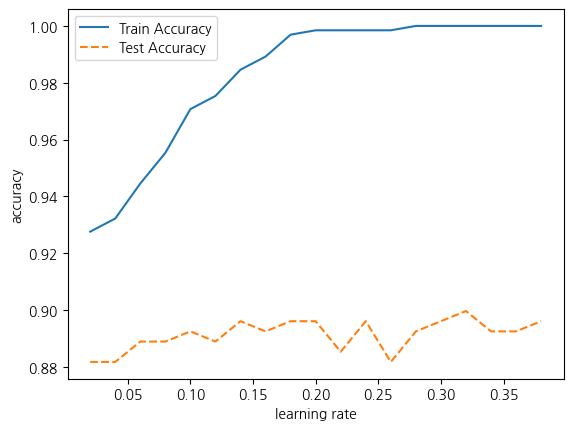

In [14]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

학습률이 올라갈수록 test 정확도는 크게 변화하지 않는다. 또한 train에 더욱 과적합하게 되므로 
0.1로 선정하겠다.

#### 트리의 개수 변경에 따른 모델 성능

In [15]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=10)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))


df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.897,0.875
1,20,0.926,0.882
2,30,0.932,0.885
3,40,0.935,0.889
4,50,0.941,0.892
5,60,0.946,0.889
6,70,0.952,0.892
7,80,0.955,0.889
8,90,0.963,0.896
9,100,0.971,0.892


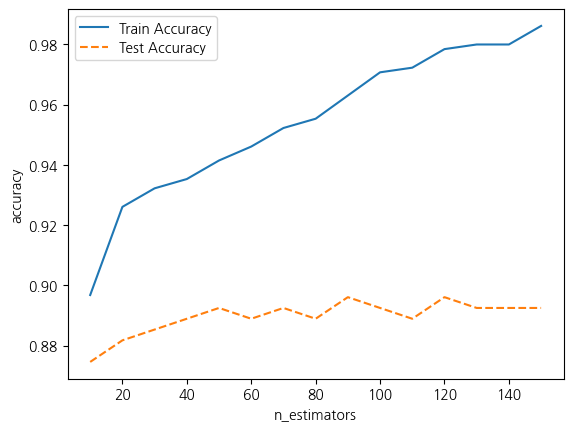

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

#### 트리수가 늘어나도 특별한 차이가 보이지 않기에 default 값인 100으로 선정했다.

#### max_depth : 최대 깊이에 따른 모델 성능

In [17]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1, random_state=10)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.906,0.892
1,2,0.928,0.900
2,3,0.971,0.892
3,4,0.989,0.882
4,5,1.000,0.878
5,6,1.000,0.889
6,7,1.000,0.885
7,8,1.000,0.885
8,9,1.000,0.882
9,10,1.000,0.878


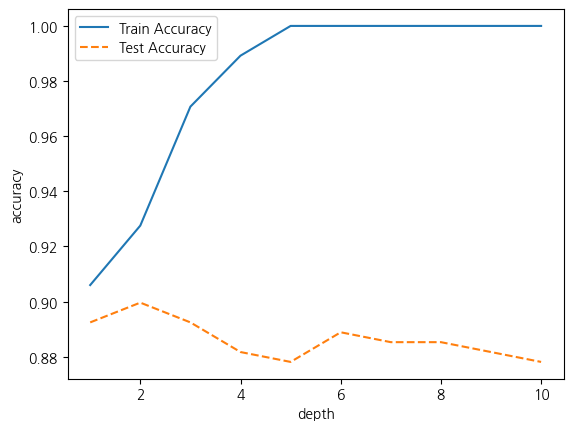

In [18]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

#### 깊이를 2를 넘어가면 과적합이 되므로 2로 선정하였다.

#### 분리 노드의 최소 샘플 수 변경에 따른 모델 성능

In [19]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=2, n_estimators=100, learning_rate=0.1, random_state=10)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.928,0.896
1,30,0.920,0.903
2,40,0.920,0.903
3,50,0.920,0.896
4,60,0.918,0.892
5,70,0.918,0.892
6,80,0.918,0.892
7,90,0.921,0.892
8,100,0.921,0.892


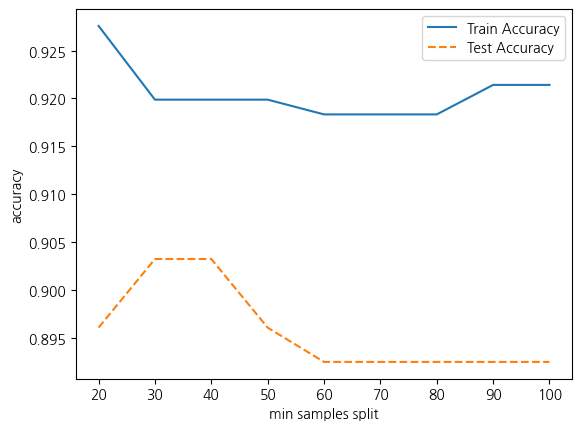

In [20]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

train test 성능변화에 차이가 거의 없으므로 값을 지정하지 않겠다.

#### leaf 수 변경에 따른 모델 성능

In [21]:

train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=2, n_estimators=100, learning_rate=0.1, random_state=10)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.926,0.900
1,10,0.926,0.896
2,15,0.918,0.896
3,20,0.917,0.892
4,25,0.898,0.882
5,30,0.903,0.867
6,35,0.904,0.860
7,40,0.906,0.864
8,45,0.857,0.849
9,50,0.855,0.842


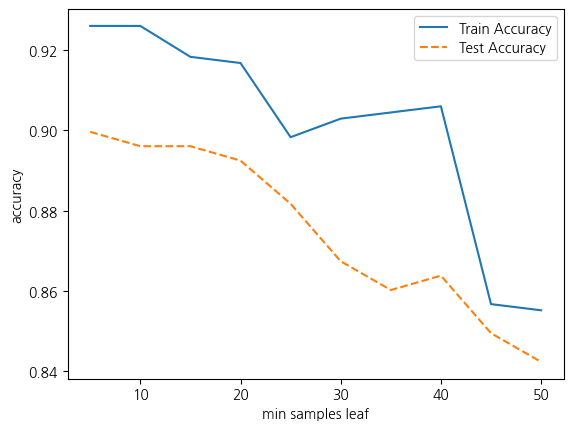

In [22]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

##### min samples leaf = 5일때 성능이 가장 높아서 5로 선정하겠다.

#### 결론 도출
##### 최종 모델 선택

In [23]:
gb_final = GradientBoostingClassifier(min_samples_leaf=5, max_depth=2, n_estimators=100, learning_rate=0.1, 
                                      random_state=10)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.926
Test Accuracy: 0.900

Test Confusion matrix: 
[[223   9]
 [ 19  28]]
              precision    recall  f1-score   support

           0      0.921     0.961     0.941       232
           1      0.757     0.596     0.667        47

    accuracy                          0.900       279
   macro avg      0.839     0.778     0.804       279
weighted avg      0.894     0.900     0.895       279



1에 대한 recall 점수가 낮지만 확실히 다른 모델에 비해 높게 나온다.

#### 설명 변수 중요도

In [24]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.288
2,DROPPED_CALLS,0.231
20,HANDSET_CAS30,0.149
4,PEAK_CALLS_TIME,0.079
8,TOTAL_CALLS_TIME,0.063
22,HANDSET_S50,0.032
7,TOTAL_CALLS_NO,0.023
5,WEEKEND_CALLS_NO,0.020
1,SERVICE_DURATION,0.018
3,PEAK_CALLS_NO,0.018


Text(0, 0.5, '설명변수')

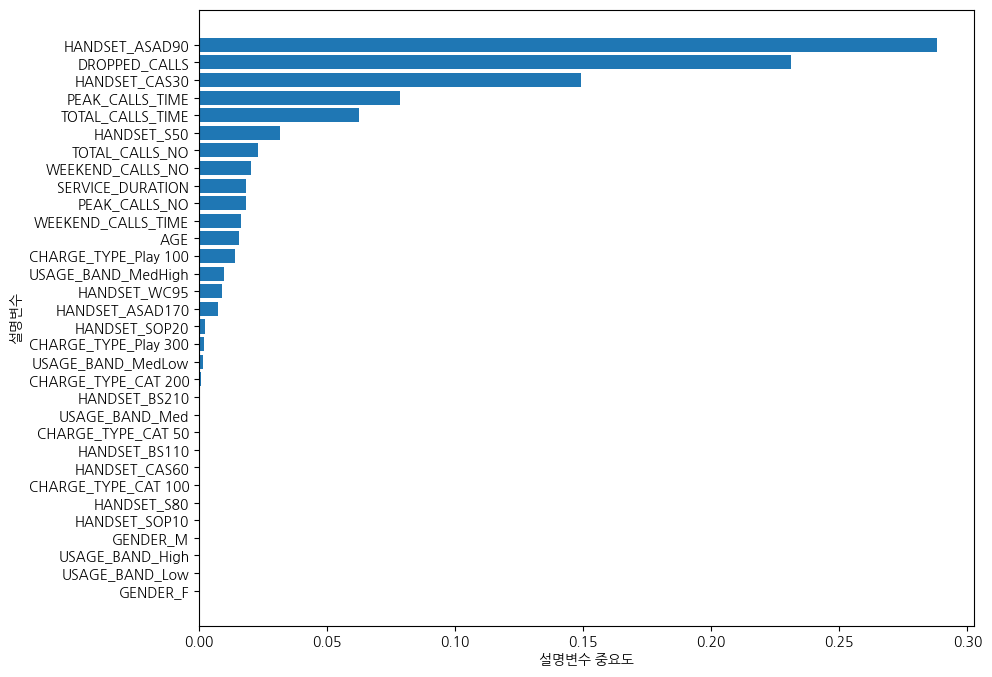

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

##### 결론 : 기종 , 콜drop , 피크 콜 타임 순으로 중요도가 높았다. 
따라서 이탈고객을 막기 위해 새로운 기종에 대한 할인혜택이나 통화무제한 같은 혜택을 제공하면 이탈하는 고객을 막을 수 있을 것이다.

### xgboost 실습


In [26]:
from xgboost import XGBClassifier

from xgboost import plot_importance

# 분류모델 통합 평가
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


In [27]:
xgboost_uncust = XGBClassifier(random_state=10)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [28]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
xgb_pred_train = xgboost_uncust.predict(df_train_x)
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
xgb_pred_test = xgboost_uncust.predict(df_test_x)
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[517   0]
 [  0 132]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[222  10]
 [ 19  28]] 

정확도: 0.8961
정밀도: 0.7368
재현율: 0.5957
F1    : 0.6588
AUC   : 0.7763


train 데이터에서의 분류는 100퍼센트 하는데 test데이터에서는 f1 score가 낮은것을 보면 <br>
train 데이터에 대해 과적합 된거을 확인 할 수 있다.

In [29]:
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=10)
xgboost_user.fit(df_train_x, df_train_y)


xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))



xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[517   0]
 [  8 124]] 

정확도: 0.9877
정밀도: 1.0000
재현율: 0.9394
F1    : 0.9688
AUC   : 0.9697

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       517
           1       1.00      0.94      0.97       132

    accuracy                           0.99       649
   macro avg       0.99      0.97      0.98       649
weighted avg       0.99      0.99      0.99       649


 사용자 모델 평가 : Test 

오차행렬:
 [[223   9]
 [ 19  28]] 

정확도: 0.8996
정밀도: 0.7568
재현율: 0.5957
F1    : 0.6667
AUC   : 0.7785

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       232
           1       0.76      0.60      0.67        47

    accuracy                           0.90       279
   macro avg       0.84      0.78      0.80       279
weighted avg       0.89      0.90      0.89       279



위 모델보다 f1 score가 올라간것은 확인되지만 유의미한 차이는 아니다.

In [30]:
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 5, random_state=10)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.43562
[1]	validation_0-logloss:0.41473
[2]	validation_0-logloss:0.39533
[3]	validation_0-logloss:0.38148
[4]	validation_0-logloss:0.37018
[5]	validation_0-logloss:0.36049
[6]	validation_0-logloss:0.35257
[7]	validation_0-logloss:0.34580
[8]	validation_0-logloss:0.33938
[9]	validation_0-logloss:0.33524
[10]	validation_0-logloss:0.32875
[11]	validation_0-logloss:0.32498
[12]	validation_0-logloss:0.31977
[13]	validation_0-logloss:0.31534
[14]	validation_0-logloss:0.31166
[15]	validation_0-logloss:0.30717
[16]	validation_0-logloss:0.30312
[17]	validation_0-logloss:0.30084
[18]	validation_0-logloss:0.29731
[19]	validation_0-logloss:0.29435
[20]	validation_0-logloss:0.29241
[21]	validation_0-logloss:0.29019
[22]	validation_0-logloss:0.28868
[23]	validation_0-logloss:0.28918
[24]	validation_0-logloss:0.28705
[25]	validation_0-logloss:0.28743
[26]	validation_0-logloss:0.28656
[27]	validation_0-logloss:0.28541
[28]	validation_0-logloss:0.28400
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [31]:
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 30
최적 성능(0-LogLoss): 0.28145732513652266


In [32]:
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[222  10]
 [ 20  27]] 

정확도: 0.8925
정밀도: 0.7297
재현율: 0.5745
F1    : 0.6429
AUC   : 0.7657

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       232
           1       0.73      0.57      0.64        47

    accuracy                           0.89       279
   macro avg       0.82      0.77      0.79       279
weighted avg       0.89      0.89      0.89       279



조기 중단 모델의 f1 score 는 0.6429로 사용자 모델보다 성능이 떨어진 것을 확인할 수 있었다.


#### 변수 중요도 확인

{'AGE': 179.0, 'SERVICE_DURATION': 143.0, 'DROPPED_CALLS': 114.0, 'PEAK_CALLS_NO': 232.0, 'PEAK_CALLS_TIME': 148.0, 'WEEKEND_CALLS_NO': 141.0, 'WEEKEND_CALLS_TIME': 167.0, 'TOTAL_CALLS_NO': 147.0, 'TOTAL_CALLS_TIME': 133.0, 'GENDER_F': 17.0, 'CHARGE_TYPE_CAT 100': 4.0, 'CHARGE_TYPE_CAT 200': 2.0, 'CHARGE_TYPE_CAT 50': 2.0, 'CHARGE_TYPE_Play 100': 22.0, 'CHARGE_TYPE_Play 300': 23.0, 'HANDSET_ASAD170': 21.0, 'HANDSET_ASAD90': 85.0, 'HANDSET_BS110': 19.0, 'HANDSET_BS210': 28.0, 'HANDSET_CAS30': 56.0, 'HANDSET_S50': 28.0, 'HANDSET_S80': 17.0, 'HANDSET_SOP10': 8.0, 'HANDSET_WC95': 25.0, 'USAGE_BAND_Med': 1.0, 'USAGE_BAND_MedHigh': 51.0, 'USAGE_BAND_MedLow': 10.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

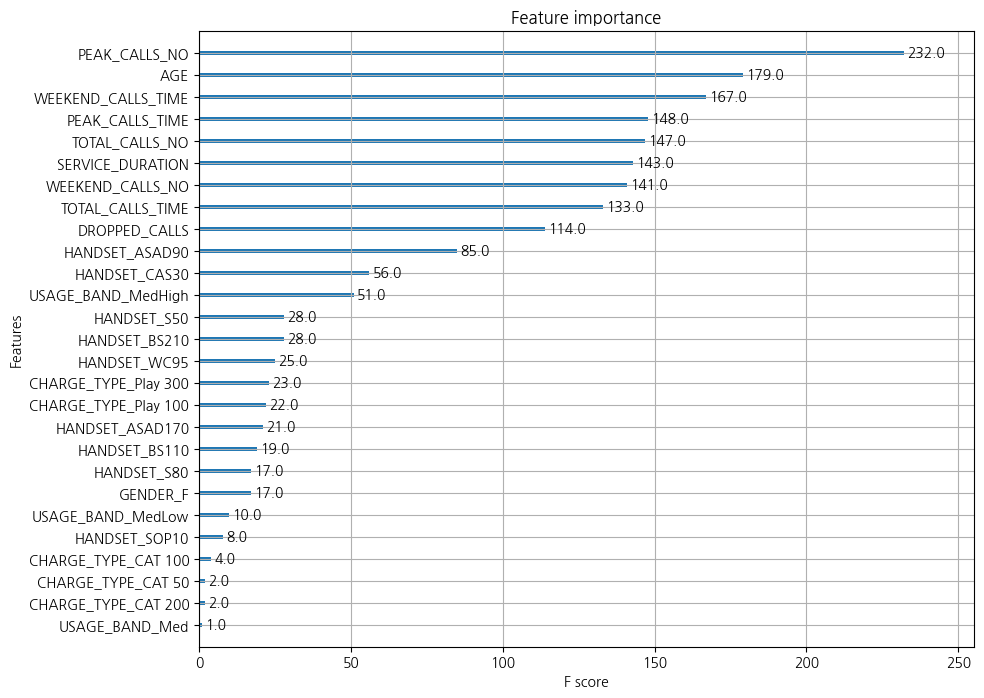

In [33]:
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

##### 결론  : 피크 콜 횟수 , 나이 , 주말 콜 시간, 피크 콜 시간 순으로 변수 중요도가 높았다. <br>
따라서 이탈고객을 막기 위해서 통화 무제한 혜택을 제공하는 전력이 있을 수 있다.

#### LGBM 모델

In [34]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from lightgbm import plot_importance

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [35]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=10)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 10,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [36]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 132, number of negative: 517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203390 -> initscore=-1.365241
[LightGBM] [Info] Start training from score -1.365241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [37]:
# 사용자 
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=10)
lgbm_user.fit(df_train_x, df_train_y)

lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 132, number of negative: 517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203390 -> initscore=-1.365241
[LightGBM] [Info] Start training from score -1.365241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

위 모델보다 사용자 지정 모델의다f1-score가 향상된 것을 확인 할 수 있다.

In [38]:
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 5, random_state=10)


lgbm_stop.fit(df_train_x, df_train_y, 
              callbacks=[early_stopping(stopping_rounds=200)], eval_metric="logloss", eval_set = eval_df)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 132, number of negative: 517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 28
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203390 -> initscore=-1.365241
[LightGBM] [Info

LGBMClassifier(max_depth=5, n_estimators=300, random_state=10)

In [39]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

최적 횟수: 44
최적 성능(0-LogLoss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.2747896692021811)])})


In [40]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 조기 중단 모델 평가 : Test 

오차행렬:
 [[223   9]
 [ 19  28]] 

정확도: 0.8996
정밀도: 0.7568
재현율: 0.5957
F1    : 0.6667
AUC   : 0.7785

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       232
           1       0.76      0.60      0.67        47

    accuracy                           0.90       279
   macro avg       0.84      0.78      0.80       279
weighted avg       0.89      0.90      0.89       279



사용자 지정 모델의 score를 비교해보면 비슷한 것을 확인 할 수 있다.

['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO', 'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME', 'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M', 'CHARGE_TYPE_CAT_100', 'CHARGE_TYPE_CAT_200', 'CHARGE_TYPE_CAT_50', 'CHARGE_TYPE_Play_100', 'CHARGE_TYPE_Play_300', 'HANDSET_ASAD170', 'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30', 'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10', 'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low', 'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow']
[54 37 32 39 38 14 15 32 31  0  0  0  0  1  4  6 12 28  2  5 20  0 14  2
  0  0 14  0  0  0  9  2]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

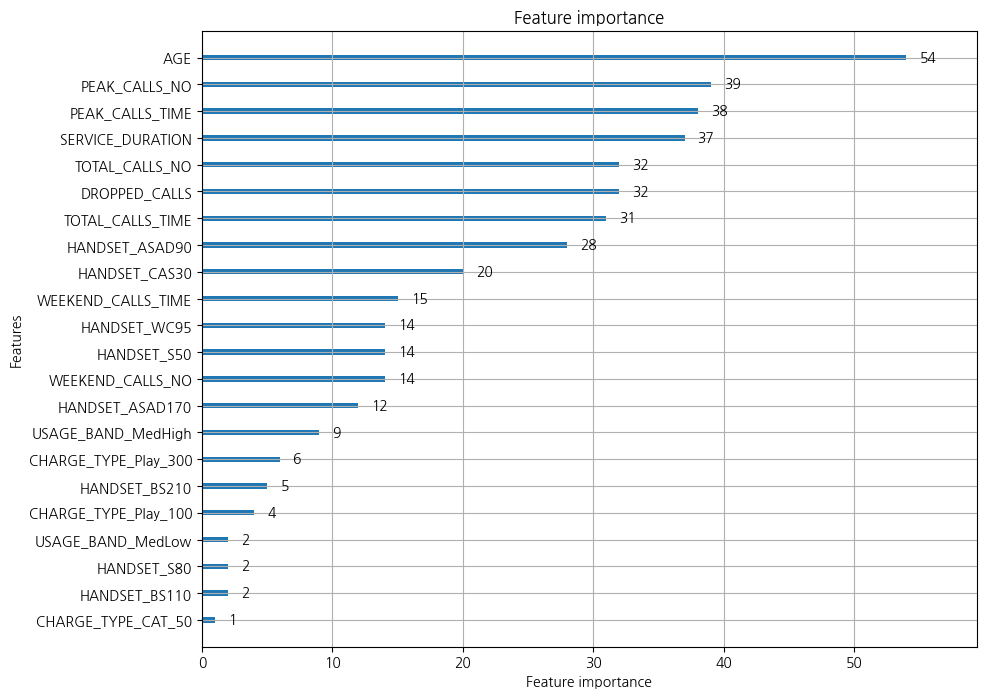

In [41]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

####  결론 : 나이 , 피크 콜 횟수, 피크 콜 시간 순으로 변수의 중요도가 높았다.
따라서 이탈 고객을 막기 위해서는 어르신을 잡는 것이 중요하고, 통화무제한 같은 혜택을 제공함으로써 고객의 이탈을 방지할 수 있을것으로 보인다.

## 실습2 서포트 벡터 머신

In [42]:
from sklearn.svm import SVC

#### 데이터 불러오기

In [107]:
# 데이터 불러오기
df_raw = pd.read_csv("통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 데이터 전처리

In [108]:
df_raw["USAGE_BAND"].value_counts()

Med        506
MedHigh    237
MedLow     107
High        63
Low         15
None         2
Name: USAGE_BAND, dtype: int64

In [109]:
# 사용 대역폭 None값 제거

df_raw.drop(df_raw[df_raw["USAGE_BAND"] == "None"].index , inplace = True)

In [110]:
df_raw.drop("CUSTOMER_ID" , axis = 1, inplace = True)
df_raw.reset_index(inplace =True , drop = True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [111]:
# 결측치 확인

df_raw.isna().sum(axis = 0)

CHURN                 0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [112]:
# 반응변수 이탈여부에 대한 라벨 인코딩

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw['CHURN'] = label_encoder.fit_transform(df_raw['CHURN'])
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [113]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

#### 범주형 설명변수 더미변환

In [114]:
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


#### 연속형 설명변수 scaling 변환

In [115]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936


#### 설명변수 데이터 결합

In [116]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007,0,...,0,0,0,0,0,0,0,1,0,0
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182,0,...,0,0,0,0,0,0,0,1,0,0
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936,1,...,1,0,0,0,0,0,0,1,0,0


In [117]:
df_x_converted.isna().sum()

AGE                     0
SERVICE_DURATION        0
DROPPED_CALLS           0
PEAK_CALLS_NO           0
PEAK_CALLS_TIME         0
WEEKEND_CALLS_NO        0
WEEKEND_CALLS_TIME      0
TOTAL_CALLS_NO          0
TOTAL_CALLS_TIME        0
GENDER_F                0
GENDER_M                0
CHARGE_TYPE_CAT 100     0
CHARGE_TYPE_CAT 200     0
CHARGE_TYPE_CAT 50      0
CHARGE_TYPE_Play 100    0
CHARGE_TYPE_Play 300    0
HANDSET_ASAD170         0
HANDSET_ASAD90          0
HANDSET_BS110           0
HANDSET_BS210           0
HANDSET_CAS30           0
HANDSET_CAS60           0
HANDSET_S50             0
HANDSET_S80             0
HANDSET_SOP10           0
HANDSET_SOP20           0
HANDSET_WC95            0
USAGE_BAND_High         0
USAGE_BAND_Low          0
USAGE_BAND_Med          0
USAGE_BAND_MedHigh      0
USAGE_BAND_MedLow       0
dtype: int64

In [118]:
df_x_converted

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007,0,...,0,0,0,0,0,0,0,1,0,0
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182,0,...,0,0,0,0,0,0,0,1,0,0
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,-0.947843,-1.192889,2.659868,-0.732891,-1.162665,0.688855,0.278331,-0.881636,-0.798136,0,...,0,0,1,0,0,0,0,1,0,0
924,2.104729,-1.195003,3.515946,-0.635714,-1.105569,-0.247191,-0.643382,0.040038,-0.756853,1,...,0,0,0,1,0,0,0,1,0,0
925,0.120557,0.747027,2.659868,-0.229335,-0.802611,0.564048,0.486814,0.997778,-0.044392,1,...,1,0,0,0,0,0,0,1,0,0
926,-0.489958,0.429932,3.230586,0.393484,-0.286417,-0.996028,-1.351126,1.049873,0.229546,1,...,1,0,0,0,0,0,0,1,0,0


In [119]:
df_x_dummy

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
924,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
925,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
926,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


#### 데이터 분할 : Train vs Test

In [120]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 10)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (649, 32)
분할된 Test Data: (279, 32)


### SVM 기본 모델 생성

In [121]:
svm_uncust = SVC(random_state=10)
svm_uncust.fit(df_train_x, df_train_y)

print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.904
Test Accuracy : 0.882


#### cost 변경에 따른 모델 성능

In [122]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [0.1 * c for c in range(1, 13)] 

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 10)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.797,0.832
1,0.2,0.797,0.832
2,0.3,0.797,0.832
3,0.4,0.798,0.832
4,0.5,0.814,0.832
5,0.6,0.837,0.835
6,0.7,0.864,0.842
7,0.8,0.883,0.857
8,0.9,0.897,0.867
9,1.0,0.904,0.882


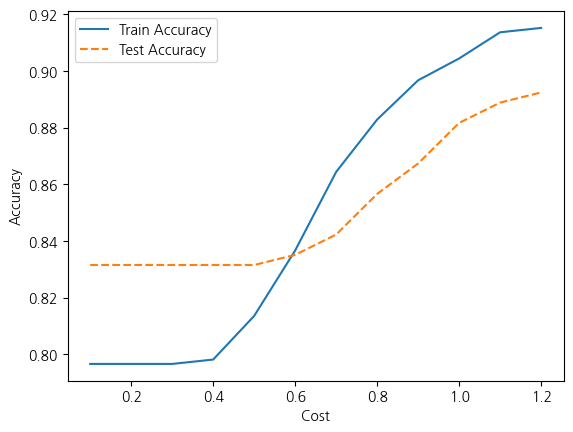

In [123]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

cost가 1.2일때 가장 높은 정확도를 나타났다. 따라서 cost값을 1.2으로 설정

#### gamma 데이터의 영향 범위 변경에 따른 모델 성능

In [124]:
train_accuracy = []; test_accuracy = []


para_gamma = [0.1 * gamma for gamma in range(1, 11)]   
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1.2, random_state = 10)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9322,0.8817
1,0.2,0.9646,0.8530
2,0.3,0.9815,0.8530
3,0.4,0.9908,0.8566
4,0.5,0.9969,0.8495
5,0.6,0.9969,0.8459
6,0.7,0.9969,0.8351
7,0.8,0.9985,0.8351
8,0.9,1.0000,0.8351
9,1.0,1.0000,0.8351


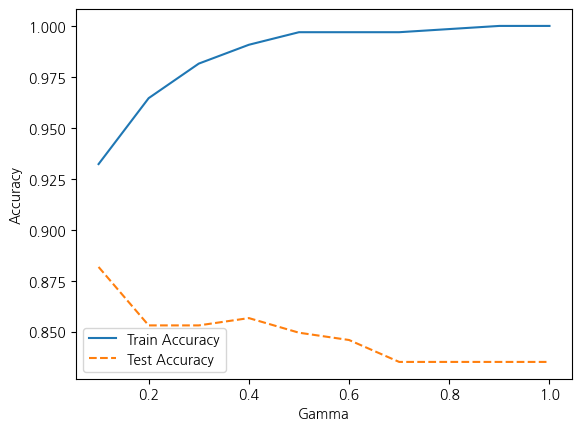

In [125]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

Gamma가 0.1일때 성능이 가장 좋으므로 0.1로 선정하였다.

### 결론 도출

In [126]:
svc_final = SVC(gamma=0.1, C=1.2, random_state=10)
svc_final.fit(df_train_x, df_train_y)

y_pred = svc_final.predict(df_test_x)


print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.932
Test Accuracy : 0.882

Test Confusion matrix: 
[[227   5]
 [ 28  19]]
              precision    recall  f1-score   support

           0      0.890     0.978     0.932       232
           1      0.792     0.404     0.535        47

    accuracy                          0.882       279
   macro avg      0.841     0.691     0.734       279
weighted avg      0.874     0.882     0.865       279



1에 대한 recall score가 낮은 것을 확인 할 수 있다. 이탈에 대한 예측력은 안좋다.

## 실습3 인공 신경망

In [63]:
from sklearn.neural_network import MLPClassifier

In [127]:
# 데이터 불러오기
df_raw = pd.read_csv("통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [128]:
df_raw["USAGE_BAND"].value_counts()

Med        506
MedHigh    237
MedLow     107
High        63
Low         15
None         2
Name: USAGE_BAND, dtype: int64

#### 데이터 전처리

In [129]:
# 사용 대역폭 None값 제거

df_raw.drop(df_raw[df_raw["USAGE_BAND"] == "None"].index , inplace = True)
df_raw.drop("CUSTOMER_ID" , axis = 1, inplace = True)
df_raw.reset_index(inplace =True, drop = True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [130]:
# 결측치 확인

df_raw.isna().sum(axis = 0)

CHURN                 0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [131]:
# 반응변수 이탈여부에 대한 라벨 인코딩

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw['CHURN'] = label_encoder.fit_transform(df_raw['CHURN'])
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [132]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [133]:
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [134]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936


In [135]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007,0,...,0,0,0,0,0,0,0,1,0,0
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182,0,...,0,0,0,0,0,0,0,1,0,0
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936,1,...,1,0,0,0,0,0,0,1,0,0


#### 데이터 분할 : Train vs Test

In [136]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 111)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (649, 32)
분할된 Test Data: (279, 32)


### 모델 생성

#### 기본 옵션 모델 : MLP

In [137]:
nn_uncust = MLPClassifier(random_state=111)
nn_uncust.fit(df_train_x, df_train_y)


print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.965
Test Accuracy: 0.900


In [138]:
# 실행옵션 확인
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 111, True, 'adam', 0.0001, 0.1, False, False])


#### 은닉층 변경에 따른 모델 성능

In [139]:
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 111) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.917,0.900
1,10,0.934,0.885
2,15,0.949,0.889
3,20,0.960,0.896
4,25,0.965,0.860
5,30,0.983,0.875
6,35,0.994,0.871
7,40,0.994,0.864
8,45,0.995,0.857
9,50,0.997,0.849


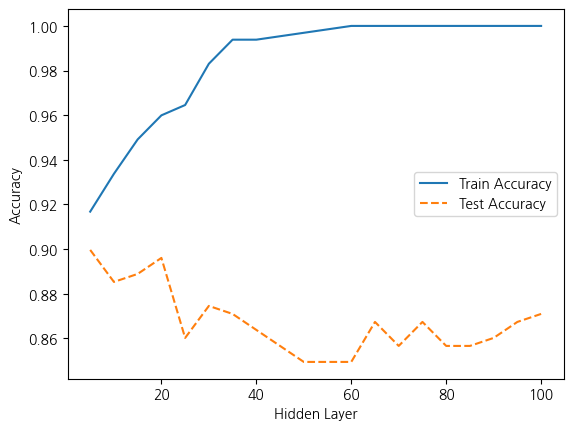

In [140]:
# 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

은닉층이 10개 이상부터는 과적합 경향을 보이므로 은닉층을 10개로 선정하였다.

#### Activation 활성화 함수 변경에 따른 모델 성능

In [141]:
train_accuracy = []; test_accuracy = []
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(10,10), random_state = 111)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.863,0.857
1,tanh,0.918,0.896
2,relu,0.934,0.885


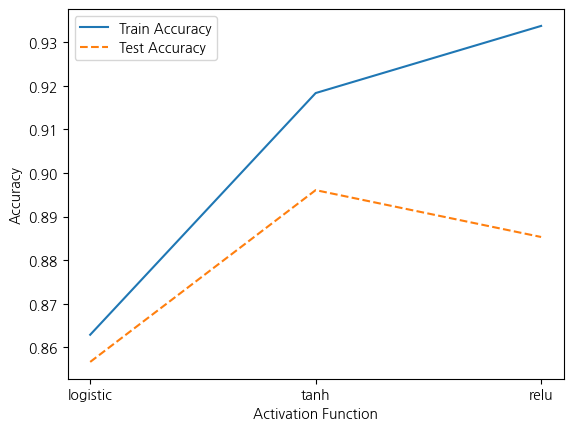

In [142]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

train 정확도는 relu가 가장 높게 나왔다. 하지만 test 에서는 tanh가 높게나왔다.<br>
알려진거에 의하면 relu가 성능이 가장 좋기 때문에 relu로 선정하였다. <br>


#### 가중치 최적화 변경에 따른 모델 성능 변화

In [143]:
train_accuracy = []; test_accuracy = []
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes=(10,10), random_state = 1111)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.989,0.857
1,sgd,0.817,0.785
2,adam,0.931,0.857


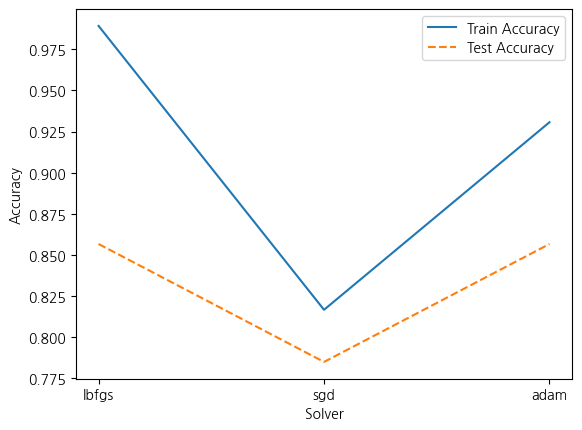

In [144]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

adam이 가장 높은 정확도를 가지고 있으므로 adam으로 선정하였다.

#### Mini Batch 변경에 따른 모델 성능

In [145]:
train_accuracy = []; test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu", 
                       hidden_layer_sizes = (10,10), random_state = 111)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    


df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.988,0.889
1,40,0.974,0.889
2,60,0.968,0.878
3,80,0.948,0.882
4,100,0.946,0.892
5,120,0.948,0.892
6,140,0.943,0.889
7,160,0.911,0.860
8,180,0.941,0.889


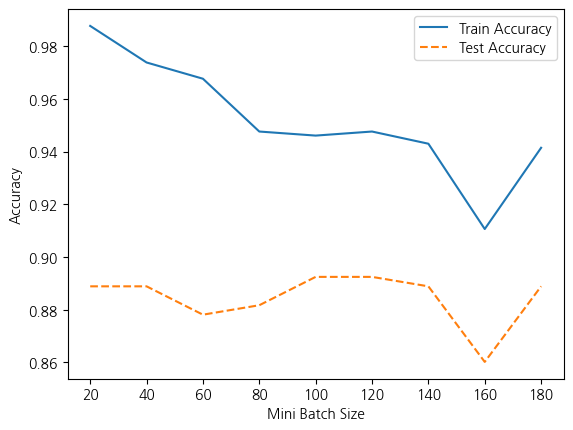

In [146]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

train 모델은 과적합 경향 , test 데이터는 미니 배치 크기가 증가할수록 오차 모델 정확도는 감소하는 경향이 있어 지정하지 않았다.

### 결론도출

In [147]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam",random_state = 111)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.934
Test Accuracy : 0.885

Test Confusion Matrix: 
[[207  12]
 [ 20  40]]
              precision    recall  f1-score   support

           0      0.912     0.945     0.928       219
           1      0.769     0.667     0.714        60

    accuracy                          0.885       279
   macro avg      0.841     0.806     0.821       279
weighted avg      0.881     0.885     0.882       279



1에 대한 recall score도 높고 f1-score도 높은 것을 볼 수 있다.<br> 
확실히 다른 모델에 비해 좋은 성능을 가졌다. 

## 모델 평가

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from collections import Counter

In [149]:
# 데이터 불러오기
df_raw = pd.read_csv("통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


### 데이터 전처리

In [150]:
# 사용 대역폭 None값 제거

df_raw.drop(df_raw[df_raw["USAGE_BAND"] == "None"].index , inplace = True)
df_raw.drop("CUSTOMER_ID" , axis = 1, inplace = True)
df_raw.reset_index(inplace =True , drop = True)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [151]:
# 결측치 확인

df_raw.isna().sum(axis = 0)

CHURN                 0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [152]:
# 반응변수 이탈여부에 대한 라벨 인코딩

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_raw['CHURN'] = label_encoder.fit_transform(df_raw['CHURN'])
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [153]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    0
1    0
2    0
3    0
4    0
Name: CHURN, dtype: int64

In [154]:
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [155]:
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936


In [156]:
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow
0,-0.032072,-0.070373,0.947712,-0.034980,-0.620836,-0.434401,-0.758596,0.076104,-0.790430,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.337329,-0.243718,2.089149,0.649679,-0.083668,-0.309595,-0.583032,0.256431,-0.463832,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.337329,1.062008,2.374509,0.150540,-0.228156,-0.996028,-1.351126,-0.328632,-0.824007,0,...,0,0,0,0,0,0,0,1,0,0
3,2.257358,1.005636,-0.479084,0.300724,-0.073181,-0.122385,1.433216,-0.084187,-0.402182,0,...,0,0,0,0,0,0,0,1,0,0
4,1.570529,1.529195,-0.764443,-0.021729,-0.279426,-0.559207,-0.665328,-0.292566,-0.715936,1,...,1,0,0,0,0,0,0,1,0,0


In [161]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 111)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (649, 32)
분할된 Test Data: (279, 32)


## 최종 모델 실행
모두다 sclaed 데이터를 사용하였다.

In [162]:
# 분석 모델 리스트
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]


train_accuracy = []; test_accuracy = []
model_auc = []
model_precision = []; model_recall = []
model_f1_score = []

model

['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

#### 의사결정나무

In [164]:
dt_final = DecisionTreeClassifier(max_depth=8, min_samples_split=20, min_samples_leaf=20, random_state=10)
dt_final.fit(df_train_x, df_train_y)

train_accuracy.append(dt_final.score(df_train_x, df_train_y))
test_accuracy.append(dt_final.score(df_test_x, df_test_y))

y_prob_1 = dt_final.predict_proba(df_test_x)[:, 1]  
y_pred = dt_final.predict(df_test_x)  

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

Confusion matrix: 
[[204  15]
 [ 15  45]]
              precision    recall  f1-score   support

           0      0.932     0.932     0.932       219
           1      0.750     0.750     0.750        60

    accuracy                          0.892       279
   macro avg      0.841     0.841     0.841       279
weighted avg      0.892     0.892     0.892       279



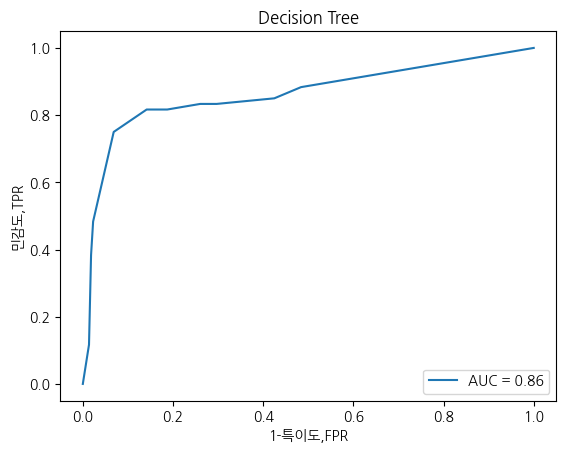

In [166]:
plt.title("Decision Tree")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [167]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.75]

#### 랜덤포레스트

In [168]:
rf_final = RandomForestClassifier(min_samples_leaf=5, max_depth=6, min_samples_split = 20,n_estimators=90, random_state=10)
rf_final.fit(df_train_x, df_train_y)

train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

y_prob_1 = rf_final.predict_proba(df_test_x)[:, 1]
y_pred = rf_final.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

Confusion matrix: 
[[216   3]
 [ 42  18]]
              precision    recall  f1-score   support

           0      0.837     0.986     0.906       219
           1      0.857     0.300     0.444        60

    accuracy                          0.839       279
   macro avg      0.847     0.643     0.675       279
weighted avg      0.841     0.839     0.806       279



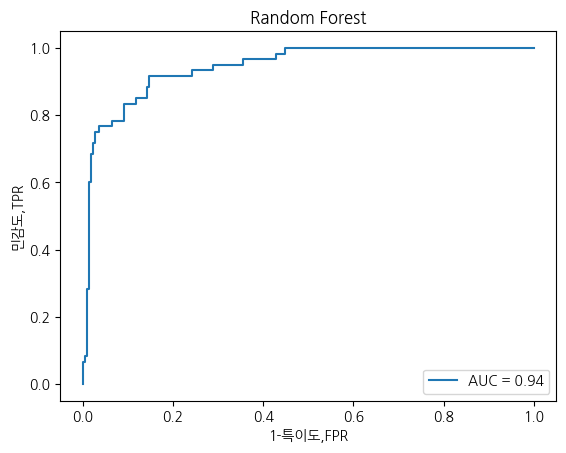

In [169]:
plt.title("Random Forest")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [170]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.75, 0.4444444444444444]

### 그래디언트 부스팅

In [171]:
gb_final = GradientBoostingClassifier(min_samples_leaf=5, max_depth=2, n_estimators=100, learning_rate=0.1, 
                                      random_state=10)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_prob_1 = gb_final.predict_proba(df_test_x)[:, 1]  
y_pred = gb_final.predict(df_test_x)  

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

Confusion matrix: 
[[212   7]
 [ 20  40]] 

              precision    recall  f1-score   support

           0      0.914     0.968     0.940       219
           1      0.851     0.667     0.748        60

    accuracy                          0.903       279
   macro avg      0.882     0.817     0.844       279
weighted avg      0.900     0.903     0.899       279



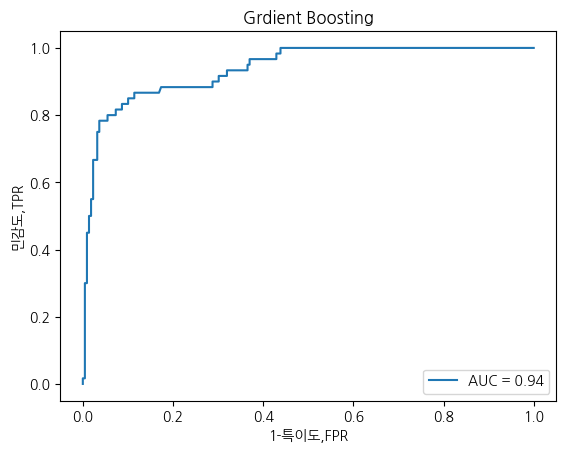

In [172]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [173]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.75, 0.4444444444444444, 0.7476635514018691]

### 인공신경망

In [175]:
nn_final = MLPClassifier(hidden_layer_sizes=(10, 10), activation="relu", solver="adam",random_state = 111)
nn_final.fit(df_train_x, df_train_y)

train_accuracy.append(nn_final.score(df_train_x, df_train_y))
test_accuracy.append(nn_final.score(df_test_x, df_test_y))

y_prob_1 = nn_final.predict_proba(df_test_x)[:, 1]  
y_pred = nn_final.predict(df_test_x) 

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

Confusion matrix: 
[[207  12]
 [ 20  40]] 

              precision    recall  f1-score   support

           0      0.912     0.945     0.928       219
           1      0.769     0.667     0.714        60

    accuracy                          0.885       279
   macro avg      0.841     0.806     0.821       279
weighted avg      0.881     0.885     0.882       279



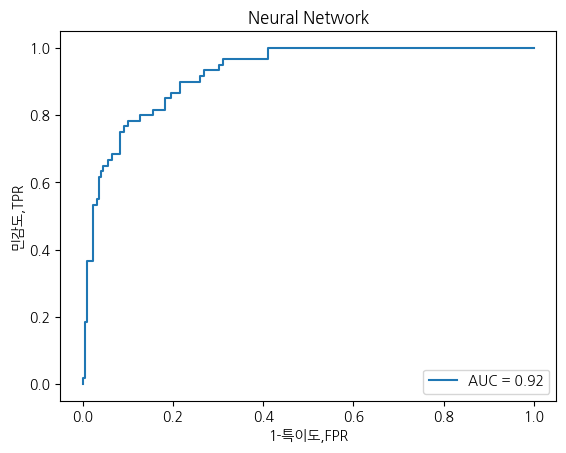

In [176]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [177]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.75, 0.4444444444444444, 0.7476635514018691, 0.7142857142857142]

## 모델별 정확도 산출 및 평가

In [178]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.875,0.892,0.862,0.750,0.750,0.750
RandomForest,0.888,0.839,0.943,0.857,0.300,0.444
GradientBoosting,0.923,0.903,0.937,0.851,0.667,0.748
NeuralNet,0.934,0.885,0.925,0.769,0.667,0.714


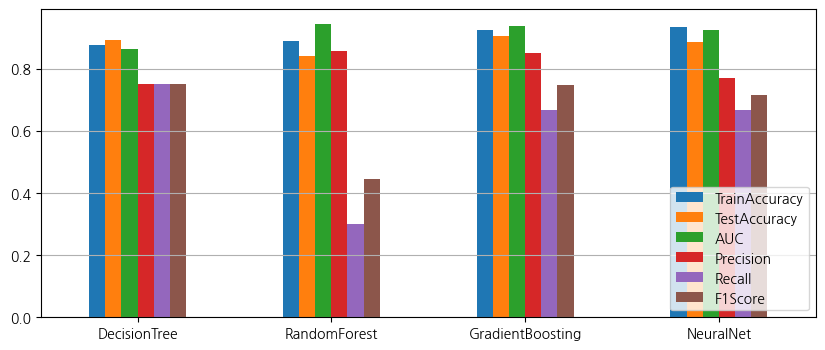

In [179]:
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right")
plt.grid(axis = "y")

### 결론
이탈에 대한 데이터 이므로 불균형이 있다. 따라서 recall score가 높은 모델이 좋은 모델이라고 할 수 있다. 이 4가지 모델중 가장 높은 점수를 갖는 모델은 의사결정나무가 되겠다.
의사결정나무는 전반적으로 모든 평가지표에 대해 비슷한 점수를 갖고 있다.
auc커브가 다른 모델에 비해 떨어지긴 하지만 제일 좋은 모델이라고 할 수 있다. <br>
이 모델을 활용하여 이탈하는 고객을 막을 수 있을것이다.